## **Análise do setor de aviação: Boeing vs. Airbus vs. Embraer**



### Carregar as bibliotecas

In [1]:
import seaborn as sns
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

### Criar uma função que baixa os preços das ações da Embraer, armazena e retorna ele em um dataframe

In [2]:
def dados_preços():
    # Definir o intervalo de datas: de 01/01/2017 até 21/06/2024.
    start = dt.datetime(2017, 1, 1)
    end = dt.datetime(2024, 6, 21 )

    # Lista de tickers das empresas
    tickers = ['EMBR3.SA']

    # Criar um DataFrame vazio para armazenar os dados
    df = pd.DataFrame()

    # Baixar os dados de fechamento da empresa e armazenar no DataFrame df
    for ticker in tickers:
        try:
            data = yf.download(ticker, start=start, end=end)['Close']
            # Renomear a coluna do DataFrame para incluir o ticker
            df[ticker.split('.')[0]] = data
        except Exception as e:
            print(f"Erro ao baixar dados para {ticker}: {e}")

    # Resetar o índice para incluir a coluna de datas no DataFrame
    df.reset_index(inplace=True)

    return df

### Carregar a função com os dados obtidos e armazená-lo no dataframe

In [3]:
# Colocar os dados obtidos em um dataframe, df
df = dados_preços()

[*********************100%%**********************]  1 of 1 completed


In [4]:
df.head()

,Date,EMBR3
0,2017-01-02,16.000000
1,2017-01-03,16.360001
2,2017-01-04,16.170000
3,2017-01-05,16.500000
4,2017-01-06,16.580000


### Criar um gráfico de dispersão com linhas padrão com os dados

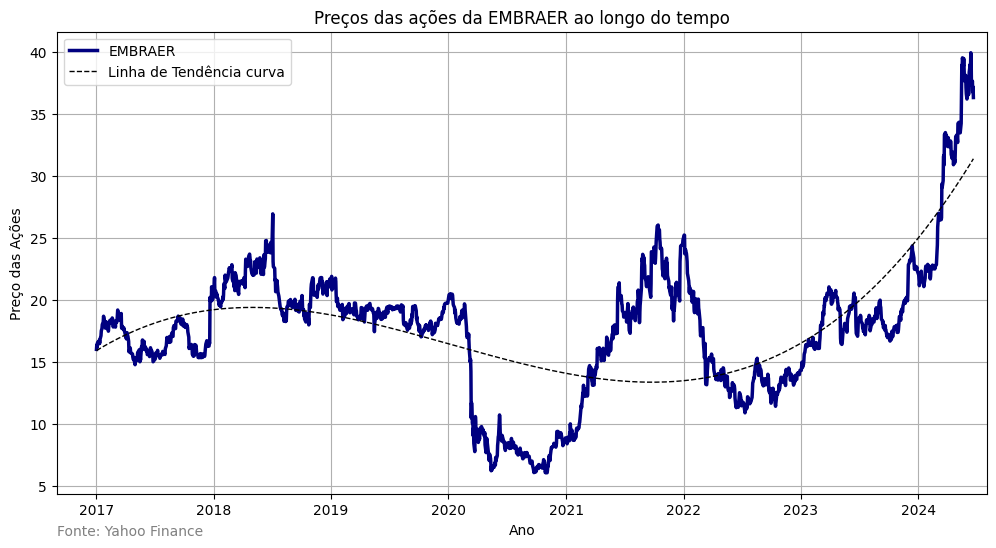

In [5]:
# Criar uma coluna de data a partir da coluna 'Date'
df['data'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.set_index('data', inplace=True)

# Criar uma figura
plt.figure(figsize=(12, 6))

# Plotar os dados sobre os preços das ações da WEG
plt.plot(df['Date'], df['EMBR3'], label='EMBRAER', color='navy', linewidth=2.5)

# Adicionar linha de tendência
df['Date_numeric'] = df.index.astype('int64') // 10**9
coeficientes = np.polyfit(df['Date_numeric'], df['EMBR3'], 3)
tendencia = np.poly1d(coeficientes)
plt.plot(df.index, tendencia(df['Date_numeric']), label='Linha de Tendência curva', color='black', linestyle='--', linewidth=1)

# Nomear os eixos do gráfico
plt.xlabel('Ano')
plt.ylabel('Preço das Ações')

# Entitular o gráfico
plt.title('Preços das ações da EMBRAER ao longo do tempo')

# Mostrar a legenda no gráfico
plt.legend()

# Mostrar as grades no gráfico
plt.grid()

# Configurar o limite do eixo x
plt.xlim(pd.Timestamp('2016-09-01'), pd.Timestamp('2024-08-01'))

# Adicionar um texto dizendo a fonte dos dados
plt.text(pd.Timestamp('2016-09-01'), 1, 'Fonte: Yahoo Finance', fontsize=10, color='gray', horizontalalignment='left')

# Mostrar o gráfico
plt.show()

### Criar um gráfico de dispersão puro com os dados e tacar uma linha de tendência diferente da primeira

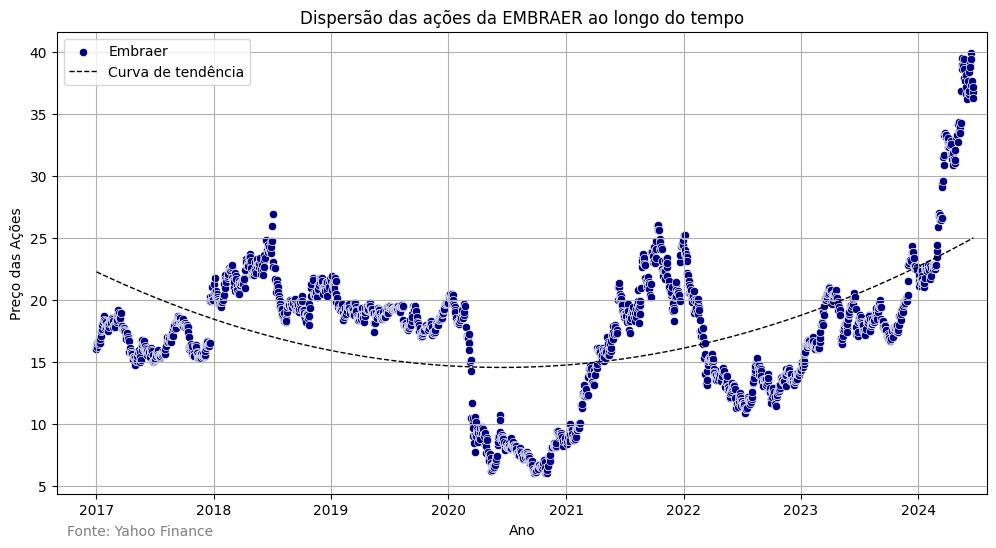

In [6]:
# Criar uma figura
plt.figure(figsize=(12, 6))

#Plotar os dados de preços da embraer em um gráfico de dispersão
sns.scatterplot(data=df, x='Date', y='EMBR3', color = 'navy', label = 'Embraer')

# Adicionar linha de tendência
df['Date_numeric'] = df.index.astype('int64') // 10**9
coeficientes = np.polyfit(df['Date_numeric'], df['EMBR3'], 2)
tendencia = np.poly1d(coeficientes)
plt.plot(df.index, tendencia(df['Date_numeric']), label='Curva de tendência', color='black', linestyle='--', linewidth=1)

# Nomear os eixos do gráfico
plt.xlabel('Ano')
plt.ylabel('Preço das Ações')

# Entitular o gráfico
plt.title('Dispersão das ações da EMBRAER ao longo do tempo')

# Mostrar a legenda no gráfico
plt.legend()

# Mostrar as grades no gráfico
plt.grid()

# Configurar o limite do eixo x
plt.xlim(pd.Timestamp('2016-09-01'), pd.Timestamp('2024-08-01'))

# Adicionar um texto dizendo a fonte dos dados
plt.text(pd.Timestamp('2016-10-01'), 1, 'Fonte: Yahoo Finance', fontsize=10, color='gray', horizontalalignment='left')

# Mostrar o gráfico
plt.show()

### Criar um histograma de dispersão dos preços de forma a visualizar a distribuição dele ao longo do tempo

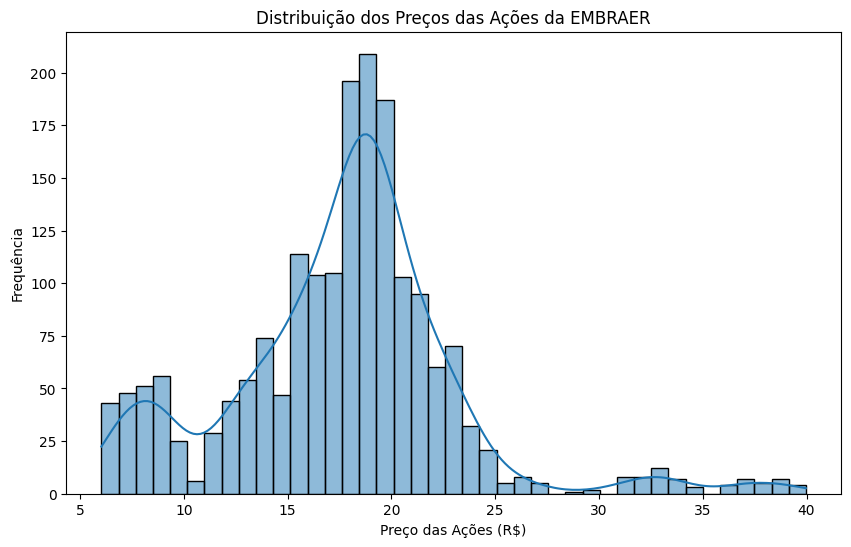

In [7]:
# Criar uma figura
plt.figure(figsize=(10, 6))
sns.histplot(df['EMBR3'], kde=True)
plt.title('Distribuição dos Preços das Ações da EMBRAER')
plt.xlabel('Preço das Ações (R$)')
plt.ylabel('Frequência')
plt.show()

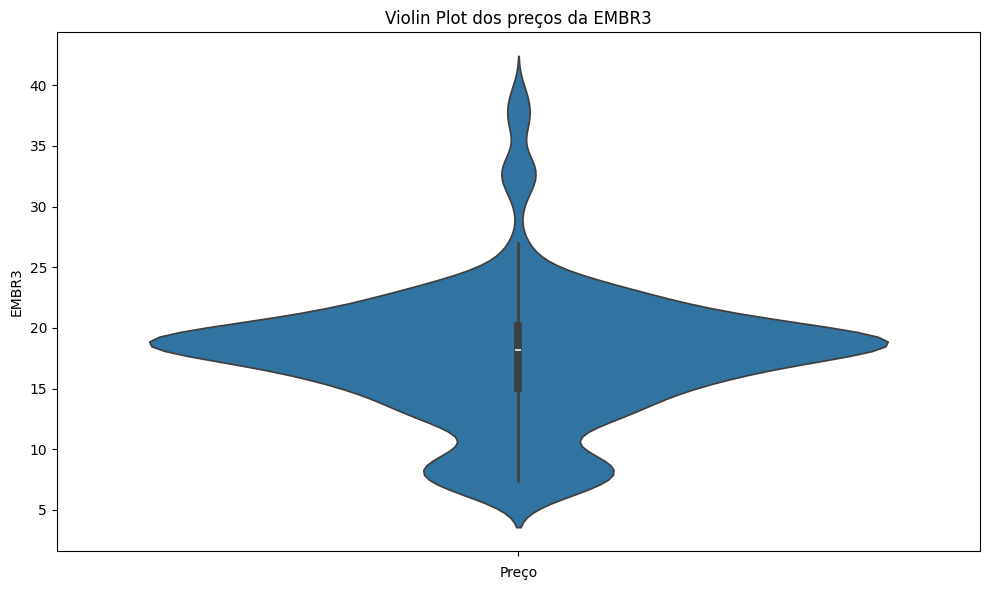

In [8]:
# Gráfico de violino
plt.figure(figsize=(10, 6))
sns.violinplot(y='EMBR3', data=df)
plt.title('Violin Plot dos preços da EMBR3')
plt.xlabel('Preço')
plt.tight_layout()

# Mostrar gráfico de violino
plt.show()

#### Perceba que a distribuição dos preços mais comum está em por volta de 15 a 20 por ação

### Vou trabalhar agora com os preços médios das ações da empresa ao longo do tempo

In [9]:
# Adicionar uma coluna com o ano
df['Year'] = df['Date'].dt.year

# Agrupar por ano e calcular o preço médio
df_new = df.groupby('Year')['EMBR3'].mean().reset_index()

In [ ]:
df_new.head()

,Year,EMBR3
0,2017,16.804961
1,2018,21.137967
2,2019,18.865202
3,2020,9.972137
4,2021,17.819960


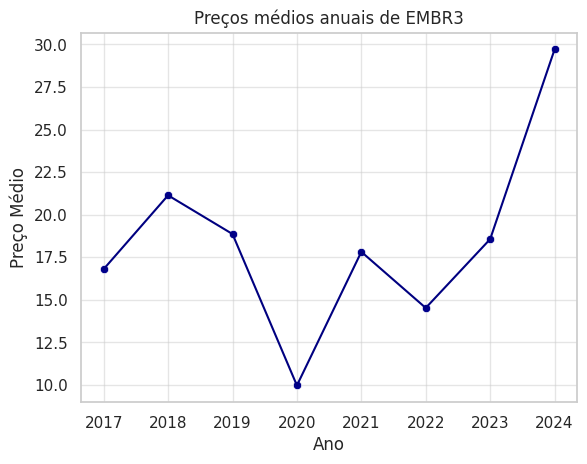

In [15]:
#Gráfico de dispersão com ano no eixo x e preço médio no eixo y
sns.scatterplot(x='Year', y='EMBR3', data=df_new, color = 'darkblue')

#gráfico de linhas para acompanhar
sns.lineplot(x='Year', y='EMBR3', data=df_new, color='navy')

#Configuro o gráfico com os nomes dos eixos e um título
plt.title('Preços médios anuais de EMBR3')
plt.xlabel('Ano')
plt.ylabel('Preço Médio')
plt.grid(alpha = 0.5)
plt.show()

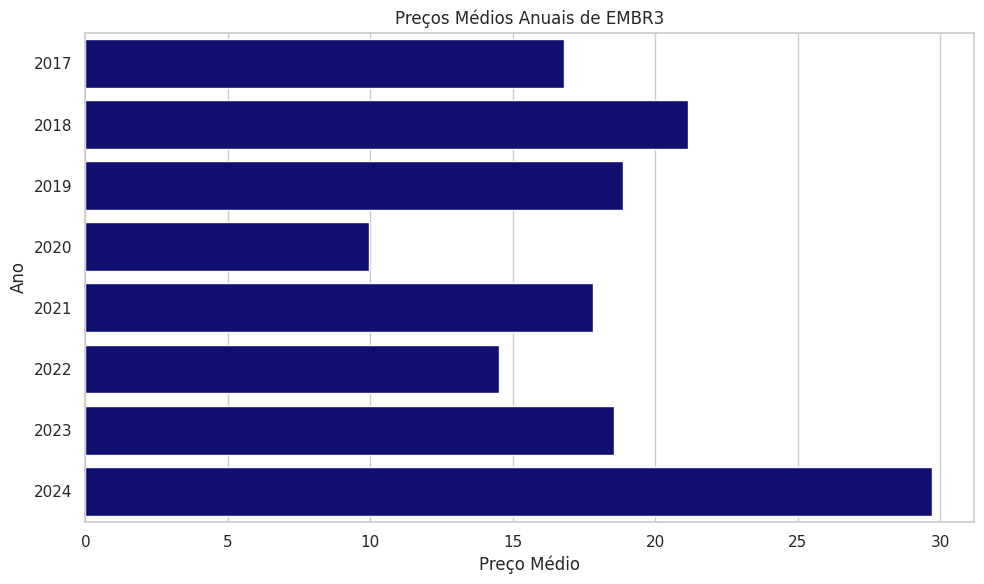

In [16]:
# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Gráfico de barras horizontal para os preços médios anuais
plt.figure(figsize=(10, 6))
sns.barplot(x='EMBR3', y='Year', data=df_new, orient='h', color = 'navy')
plt.title('Preços Médios Anuais de EMBR3')
plt.xlabel('Preço Médio')
plt.ylabel('Ano')
plt.tight_layout()

# Mostrar gráfico de barras horizontal
plt.show()




---



### Agora quero plotar o gráfico para visualizar o comportamento dos preços das ações em diferentes anos. Aqui quero examinar as tendências de preços ao longo dos anos, ou seja, em que ano ele tendeu a subir ou cair.

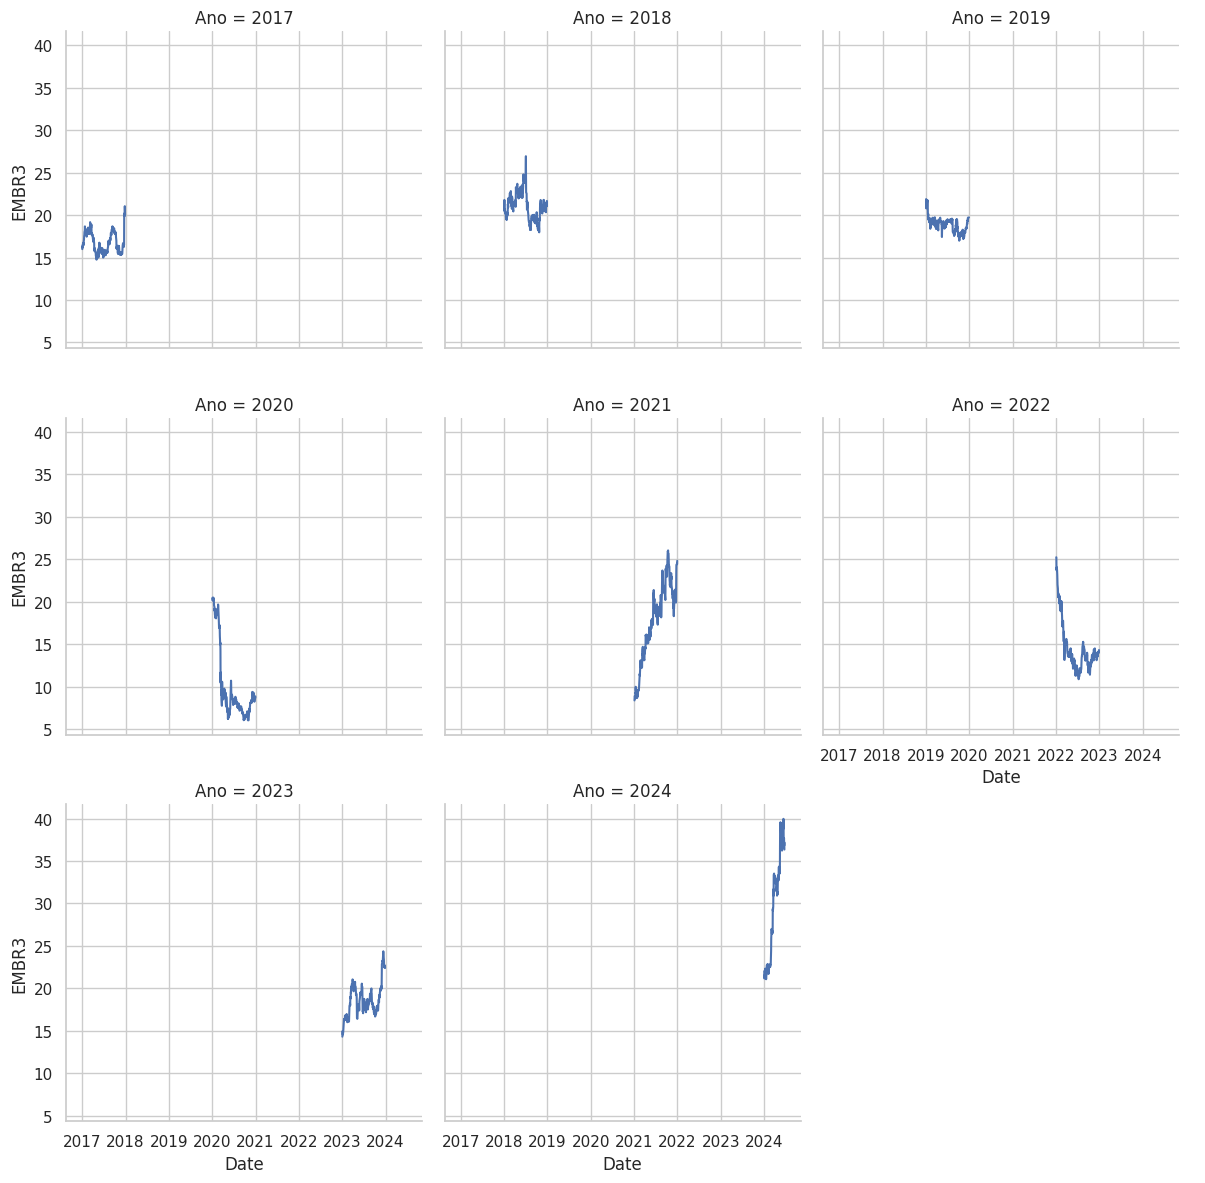

In [17]:
#Visualizar o comportamento dos preços em diferentes anos

#Coloco a data em anos apenas
df['Ano'] = df.index.year

#Crio uma variável, g, onde armazeno um gráfico que mostra o comportamento dos preços em vários anos de forma individual para cada ano
g = sns.FacetGrid(df, col='Ano', col_wrap=3, height=4)

#Configuro os dados dos eixos:

#Colunas de dados que vou plotar
g.map(sns.lineplot, 'Date', 'EMBR3')

#Legenda
g.add_legend()

#Mostrar o gráfico gerado
plt.show()


Analisando cada ano individualmente temos o seguinte:

*   2017:  estabilidade + leve subida
*   2018: manutenção de uma leve subida + leve queda e estabilidade
*   2019: manutenção de estabilidade
*   2020: forte queda (ano da pandemia)
*   2021: recuperação das perdas (a tal recuperação em V)
*   2022: queda (bem menos intensa que na pandemia), mas ainda assim uma boa queda
*   2023: recuperação daquela queda do ano anterior
*   2024: forte subida, com preço chegando a um novo recorde (problemas na Boeing==> enfraquecimento da concorrência e potencial crescimento futuro)







### Calculando a média dos preços das ações da Embraer no período:

In [22]:
#Calcular a média dos preços das ações da Embraer no período
média_embr = df['EMBR3'].mean()

#Calcular o preço atual das ações
méd_at_embr = df.at['2024-06-20', 'EMBR3']

In [23]:
#Exibir os preços
print('Média do período:')
print(média_embr)
print()
print('Preço atual:')
print(méd_at_embr)

Média do período:
17.623636357305895

Preço atual:
36.349998474121094


In [28]:
# Calcular a diferença percentual
p_dif = (méd_at_embr - média_embr) / média_embr

# Formatando o resultado como porcentagem
dif_percentual = p_dif * 100

# Imprimindo o resultado formatado com duas casas decimais
print(f'Diferença percentual: {dif_percentual:.2f}%')


Diferença percentual: 106.26%


#### Perceba que os preços atuais estão bem acima da média de preços desde de 2017

### Dizer se o preço é justo ou está acima precisaria de outros cálculos. Vamos avaliar o desempenho em termos de lucros da empresa no últimos anos para termos uma noção do desempenho da empresa:

#### Baixar os dados financeiros da empresa:

In [82]:
def DRE():
    # Lista de tickers das empresas
    tickers = ['EMBR3.SA']
    df1 = []

    # Loop para baixar a Demonstração de Resultados do Exercício da empresa
    for ticker in tickers:
        ativo = yf.Ticker(ticker)
        dre = ativo.financials
        df1.append(dre.T)

    # Concatenar as Demonstrações de Resultados do Exercício em um único dataframe
    resultado = pd.concat(df1)
    resultado.reset_index(inplace=True)
    resultado.rename(columns={'index': 'Ano'}, inplace=True)
    return resultado

In [107]:
# Armazenar os dados na variável dre_resultado:
dre_resultado = DRE()

In [108]:
#Renomeando os nomes das colunas para Receita Total e Lucro Líquido:
dre_resultado.rename(columns={'Total Revenue': 'Receita Total', 'Net Income': 'Lucro Líquido'}, inplace=True)

#Reconfigurando as datas para mostrar apenas os anos:
dre_resultado['Ano'] = pd.to_datetime(dre_resultado['Ano']).dt.year

### Exibir as receitas da empresa dos últimos 4 anos

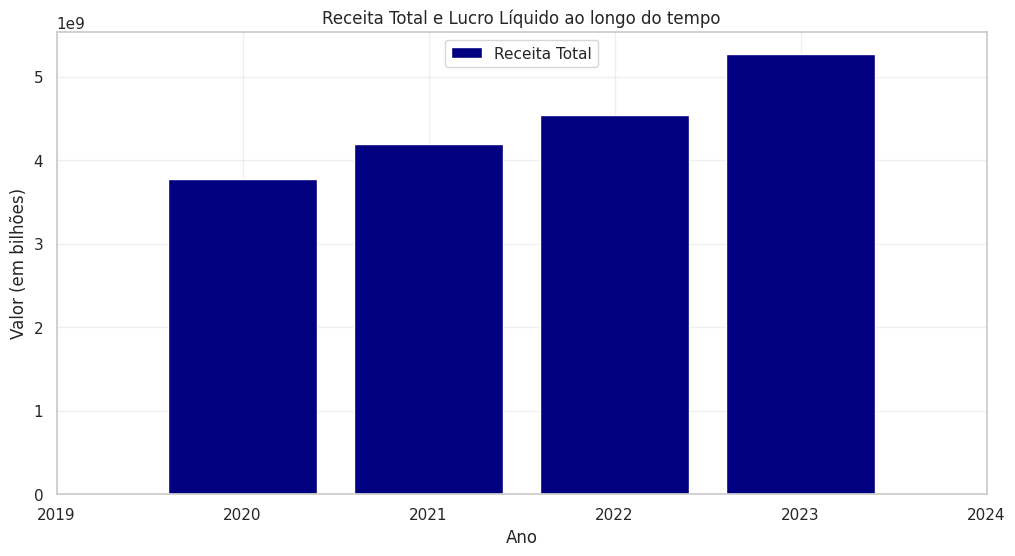

In [109]:
# Criar uma figura:
plt.figure(figsize=(12, 6))

# Plotar os gráficos:
plt.bar(dre_resultado['Ano'], dre_resultado['Receita Total'], label='Receita Total', color='navy')

# Nomear os eixos do gráfico
plt.xlabel('Ano')
plt.ylabel('Valor (em bilhões)')
plt.title('Receita Total e Lucro Líquido ao longo do tempo')

plt.xlim(2019, 2024)
# Mostrar a legenda no gráfico
plt.legend()

# Mostrar as grades no gráfico
plt.grid(True, alpha=0.3)
plt.show()

### Vou mostrar agora o lucro anual da empresa:

In [106]:
#Lucro por ano:
Lucro = dre_resultado[['Ano','Lucro Líquido']]
print('Lucro por ano:')
print(Lucro)
print()
print('Lucro em 2023:')
print(Lucro[Lucro['Ano'] == 2023]['Lucro Líquido'])

Lucro por ano:
    Ano Lucro Líquido
0  2023   164000000.0
1  2022  -185400000.0
2  2021   -44700000.0
3  2020  -731900000.0
4  2019           NaN

Lucro em 2023:
0    164000000.0
Name: Lucro Líquido, dtype: object


### Mostrar isso em um gráfico:

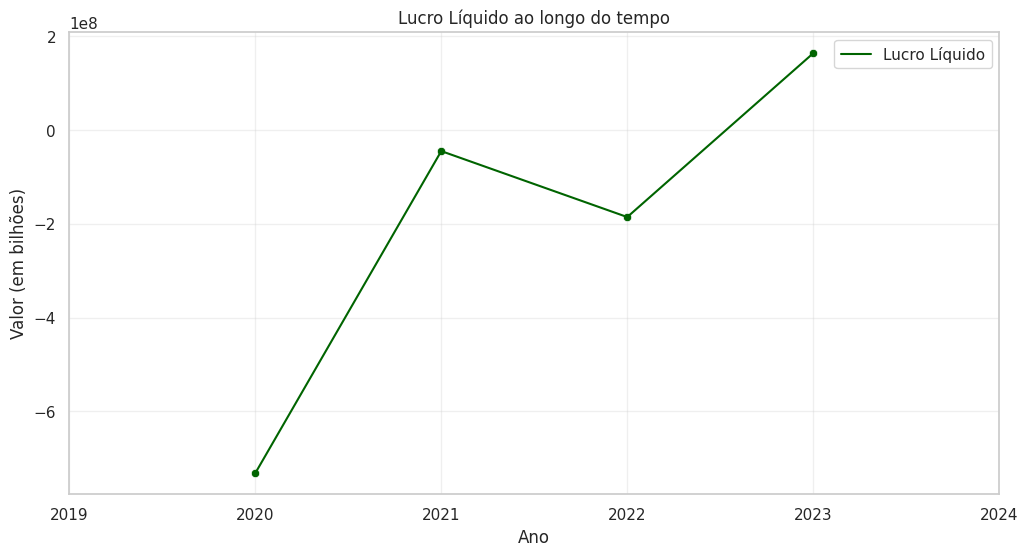

In [100]:
# Criar uma figura:
plt.figure(figsize=(12, 6))

# Plotar os gráficos:
sns.scatterplot(x='Ano', y='Lucro Líquido', data=dre_resultado, color='darkgreen')
sns.lineplot(x='Ano', y='Lucro Líquido', data=dre_resultado, label='Lucro Líquido', color='darkgreen')

# Nomear os eixos do gráfico
plt.xlabel('Ano')
plt.ylabel('Valor (em bilhões)')
plt.title('Lucro Líquido ao longo do tempo')

plt.xlim(2019, 2024)
# Mostrar a legenda no gráfico
plt.legend()

# Mostrar as grades no gráfico
plt.grid(True, alpha=0.3)
plt.show()

#### Veja que a empresa conseguiu se recuperar da pandmia e finalmente obter um lucro positivo no último ano

### Calculando a variabilidade dos preços das ações da Embraer

In [13]:
#Calcular o desvio padrão da coluna 'EMBR3'
desvio_padrao_embr = df['EMBR3'].std()
print(desvio_padrao_embr)

5.5398847158098645


#### Desvio padrão não muito grande se comparado com outras empresas da bolsa brasileira. E, como se verá, abaixo das "concorrentes diretas"



---



---



### **Vou baixar os dados das concorrentes da Embraer (Airbus e Boeing)**

In [110]:
# Lista de tickers
tickers = ['BA', 'EADSY']

#Dicionário empresas:
empresas = {'BA': 'Boeing', 'EADSY': 'Airbus'}

#Definindo cores: crio um dicionário:
cores ={'BA':'indigo', 'EADSY':'darkgreen'}

# Definir o intervalo de datas
start_date = dt.datetime(2017, 1, 1)
end_date = dt.datetime(2024, 6, 21)

In [111]:
def preços_concorrentes():
    data = pd.DataFrame()
    for ticker in tickers:
        try:
            stock_data = yf.download(ticker, start=start_date, end=end_date)['Close']
            data[ticker] = stock_data
        except Exception as e:
            print(f"Erro ao baixar dados para {ticker}: {e}")
    return data

In [112]:
stock_data = preços_concorrentes()

# Escrever as primeiras 5 linhas do dataframe
print(stock_data.head())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                    BA      EADSY
Date                             
2017-01-03  156.970001  16.520000
2017-01-04  158.619995  16.719999
2017-01-05  158.710007  17.090000
2017-01-06  159.100006  17.080000
2017-01-09  158.320007  17.170000


In [113]:
# Redefinir o índice para que o índice original seja considerado como uma coluna do DataFrame
stock_data.reset_index(inplace=True)

# Converter a coluna 'Date' para datetime, para evitar possíveis erros em datas
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

In [116]:
# Criar um DataFrame longo para facilitar a plotagem das duas empresas juntas com o Seaborn
stock_data_long = pd.melt(stock_data, id_vars=['Date'], value_vars=tickers, var_name='Empresa', value_name='Preço')

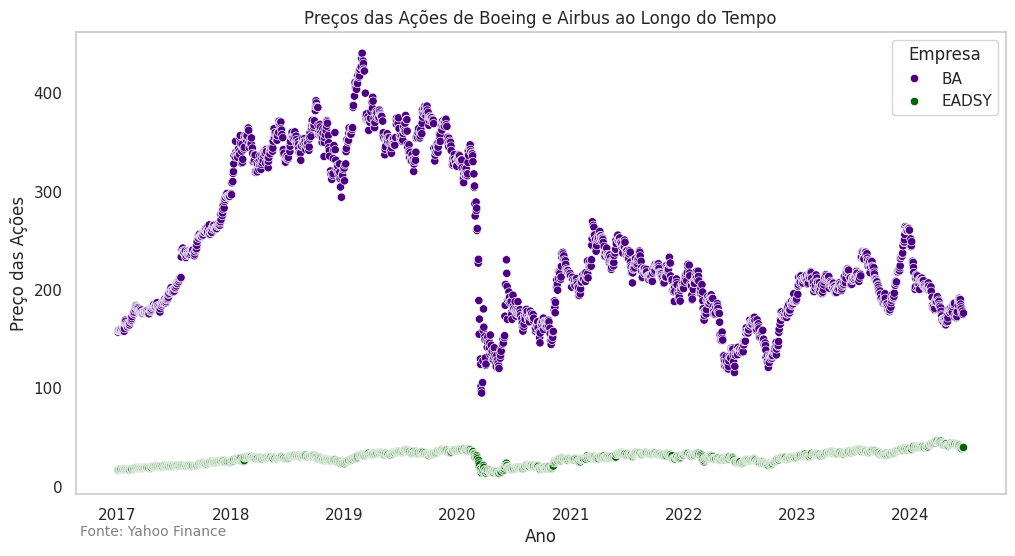

In [117]:
# Plotar os dados com Seaborn scatterplot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=stock_data_long, x='Date', y='Preço', hue='Empresa', palette=cores)
plt.title('Preços das Ações de Boeing e Airbus ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Preço das Ações')
plt.legend(title='Empresa')

# Adicionar um texto dizendo a fonte dos dados
plt.text(pd.Timestamp('2016-09-01'), -50, 'Fonte: Yahoo Finance', fontsize=10, color='gray', horizontalalignment='left')

plt.grid()
plt.show()

### Plotar no gráfico os preços das ações da Boeing:

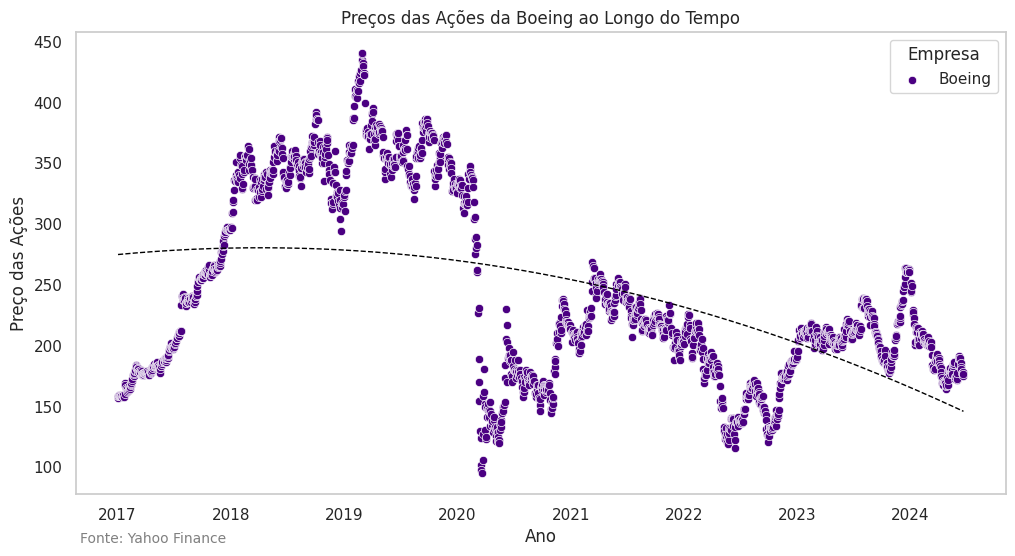

In [118]:
# Plotar os dados de Boeing com Seaborn lineplot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=stock_data, x='Date', y='BA', color=cores['BA'], label=empresas['BA'])
plt.title('Preços das Ações da Boeing ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Preço das Ações')
plt.legend(title='Empresa')

# Verificar e remover NaNs
stock_data_clean = stock_data.dropna(subset=['BA'])

# Adicionar linha de tendência
stock_data_clean['Date_numeric'] = stock_data_clean['Date'].astype('int64') // 10**9
coeficientes2 = np.polyfit(stock_data_clean['Date_numeric'], stock_data_clean['BA'], 2)
tendencia = np.poly1d(coeficientes2)
plt.plot(stock_data_clean['Date'], tendencia(stock_data_clean['Date_numeric']), label='Curva de tendência', color='black', linestyle='--', linewidth=1)

# Adicionar um texto dizendo a fonte dos dados
plt.text(pd.Timestamp('2016-09-01'), 38, 'Fonte: Yahoo Finance', fontsize=10, color='gray', horizontalalignment='left')
plt.grid()
plt.show()

### Gráfico de distribuição de preços das ações da Boeing


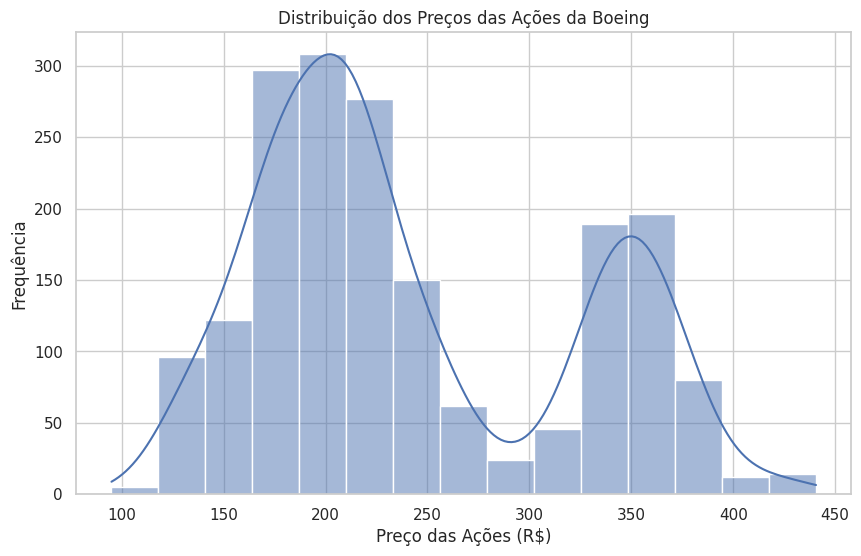

In [119]:
# Criar uma figura
plt.figure(figsize=(10, 6))
sns.histplot(stock_data['BA'], kde=True)
plt.title('Distribuição dos Preços das Ações da Boeing')
plt.xlabel('Preço das Ações (R$)')
plt.ylabel('Frequência')
plt.show()

### Calculando a variabilidade dos preços das ações da Boeing

In [120]:
# Calcular o desvio padrão da coluna 'BA', Boeing
desvio_padrao_ba = stock_data['BA'].std()
print(desvio_padrao_ba)

77.44891506910648


### **Análise da Boeing:**

#### Entre 2017 e 2018 os preços subiram muito, praticaram dobraram. Nos anos seguintes até 2020, observa-se uma manutenção de preços com uma forte pico no início de 2019. 2020, por sua vez,  é o ano da pandemia e ela caiu como todas as outras. Um "porém" é a força da queda e não recuperação em "V". A empresa recuperou algumas perdas no pós-pandemia, mas não conseguiu recuperar seu valor de mercado anterior e sua recuperação, se vier ocorrer, ocorrerá mais a médio-longo prazo (a recuperação em "V", nesse caso, foi em "V" da Nike, alguns diriam).
#### O gráfico de distribuição mostra que os preços mais comuns são os na faixa de 200 reais. Porém, também percebe-se que o preço estar na faixa de R$350 era comum até antes da pandemia.

#### O valor do desvio padrão nos ajuda a visualizar a forte volatilidade no valor desse ativo

### Plotar os preços das ações da Airbus:

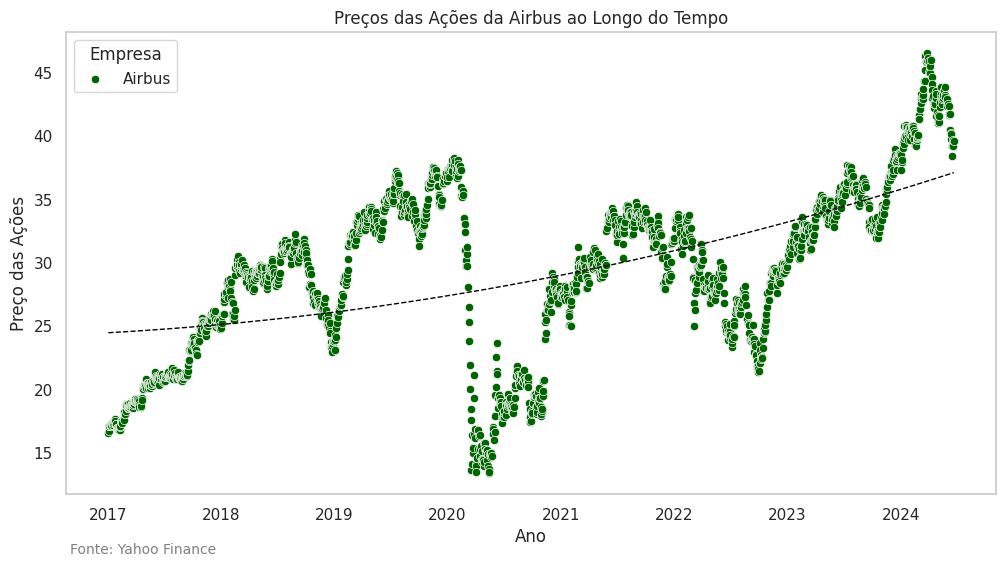

In [124]:
# Plotar os dados de Airbus com Seaborn
plt.figure(figsize=(12, 6))
sns.scatterplot(data=stock_data, x='Date', y='EADSY', color=cores['EADSY'], label=empresas['EADSY'])
plt.title('Preços das Ações da Airbus ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Preço das Ações')
plt.legend(title='Empresa')

# Verificar e remover NaNs
stock_data_clean = stock_data.dropna(subset=['EADSY'])

# Adicionar linha de tendência
stock_data_clean['Date_numeric'] = stock_data_clean['Date'].astype('int64') // 10**9
coeficientes2 = np.polyfit(stock_data_clean['Date_numeric'], stock_data_clean['EADSY'], 2)
tendencia = np.poly1d(coeficientes2)
plt.plot(stock_data_clean['Date'], tendencia(stock_data_clean['Date_numeric']), label='Curva de tendência', color='black', linestyle='--', linewidth=1)

# Adicionar um texto dizendo a fonte dos dados
plt.text(pd.Timestamp('2016-09-01'), 7, 'Fonte: Yahoo Finance', fontsize=10, color='gray', horizontalalignment='left')
plt.grid()
plt.show()

### Gráfico de distribuição de preços das ações da Airbus

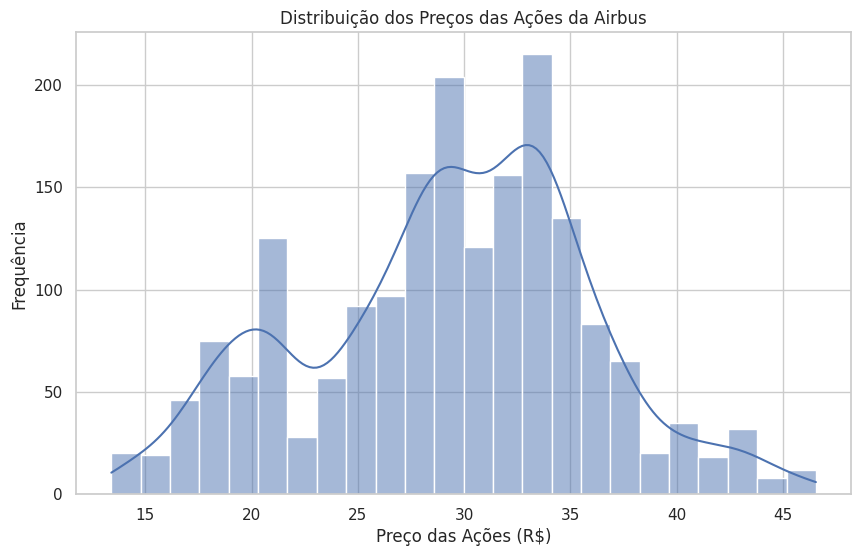

In [123]:
# Criar uma figura
plt.figure(figsize=(10, 6))
sns.histplot(stock_data['EADSY'], kde=True)
plt.title('Distribuição dos Preços das Ações da Airbus')
plt.xlabel('Preço das Ações (R$)')
plt.ylabel('Frequência')
plt.show()

In [125]:
#Calcular o desvio padrão da coluna 'EADSY'
desvio_padrao_eadsy = stock_data['EADSY'].std()
print(desvio_padrao_eadsy)

6.6029966504897


### **Análise do comportamento das ações da Airbus:**

#### Veja que a tendência era de subida consistente entre 2017 e 2020. No ano pandemia, 2020, ocorre aquela queda. Porém, como no caso da Embraer, as ações têm uma recuperação em 'V', retornando mais ou menos para o mesmo patamar anterior. Depois disso, novamente a empresa volta a obter crescimento consistente nos preços.

#### A distribuição dos preços das ações aparentam variar menos que os preços da Boeing.

#### Isso demonstra uma manutenção consistente da confiança dos investidores na empresa



---



### Vou colocar aquele gráfico FacetGrid (Para analisar o comportamento anual)

In [126]:
# Redefinir o índice para que o índice original seja uma coluna do DataFrame
stock_data.reset_index(inplace=True)

# Converter a coluna 'Date' para datetime, para evitar na leitura das datas
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Criar uma colunanova, 'Ano', onde armazeno a data em anos (2017, 2018 etc) apenas
stock_data['Ano'] = stock_data['Date'].dt.year

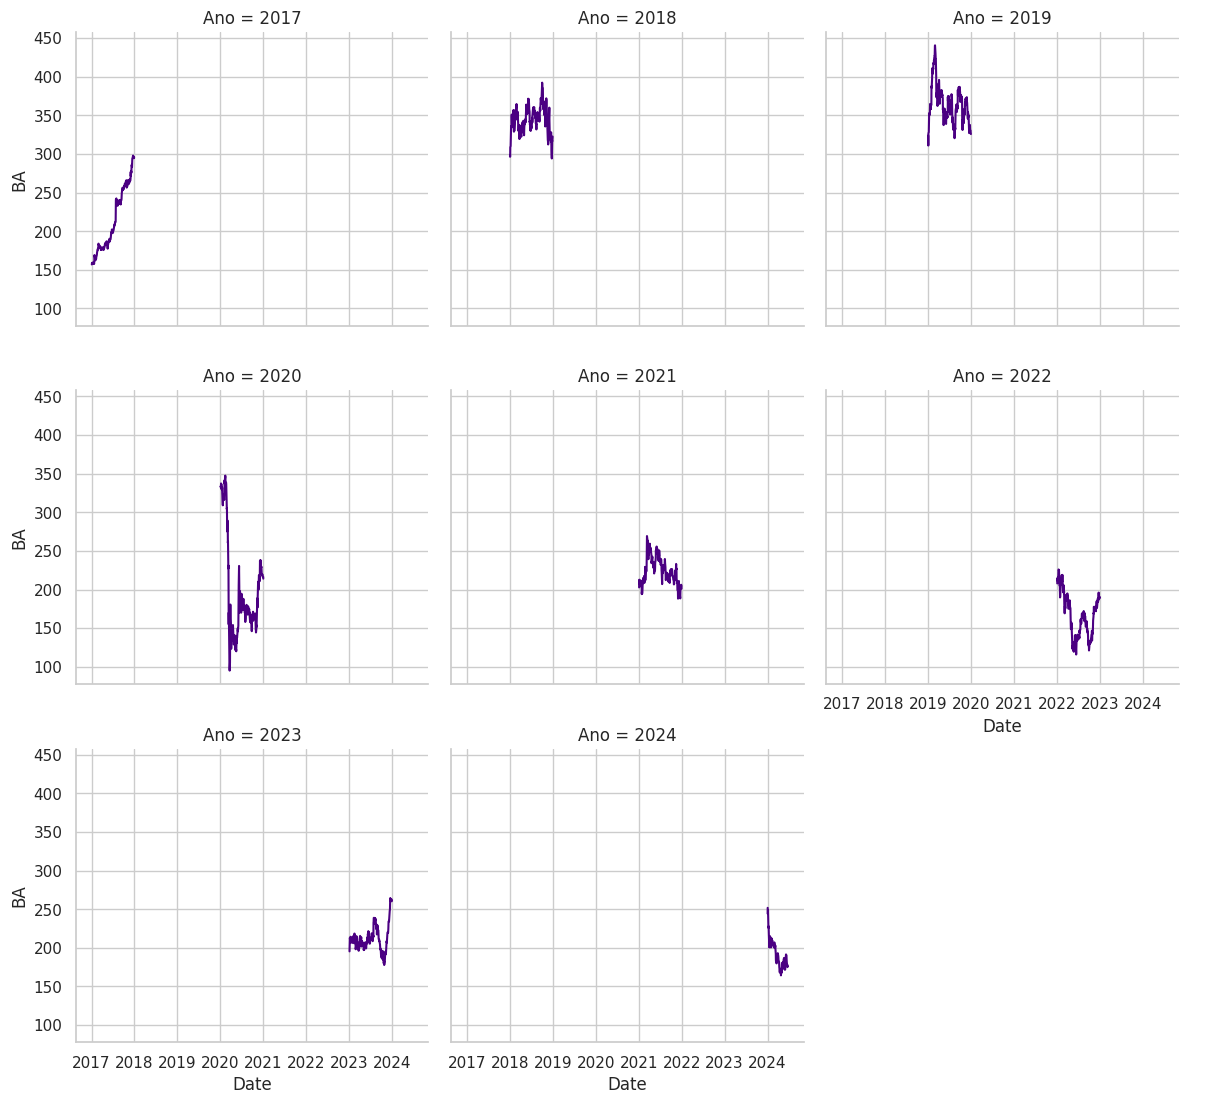

In [127]:
# Configurar o FacetGrid para mostrar o comportamento dos preços em vários anos individualmente para Boeing

g = sns.FacetGrid(stock_data, col='Ano', col_wrap=3, height=4)
g.map_dataframe(sns.lineplot, x='Date', y='BA', color=cores['BA'])
g.add_legend()
plt.subplots_adjust(top=0.9)
plt.show()


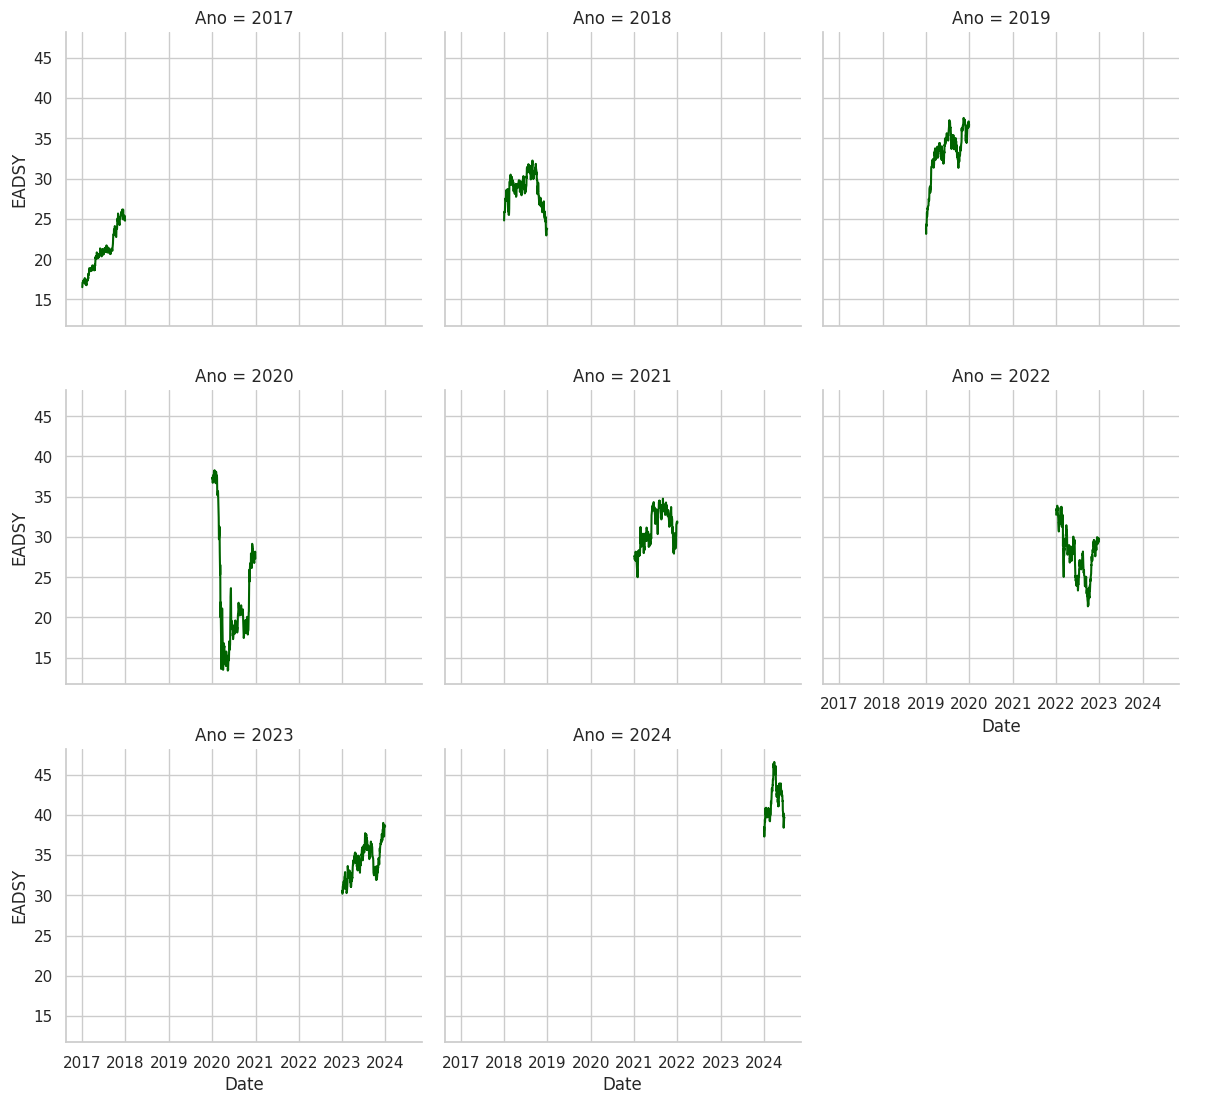

In [128]:
# Configurar o FacetGrid para mostrar o comportamento dos preços em vários anos individualmente para Airbus
g = sns.FacetGrid(stock_data, col='Ano', col_wrap=3, height=4)
g.map_dataframe(sns.lineplot, x='Date', y='EADSY', color=cores['EADSY'])
g.add_legend()
plt.subplots_adjust(top=0.9)
plt.show()

## **End.**